<img src="images/intro.jpeg">

# Project - Modelo Clustering

<div style="background-color: #2f648a; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">1. Imports</h1></center>
</div>

In [1]:
# !pip install scikit-fuzzy

In [2]:
import pandas as pd                   # pandas
from pandas import ExcelWriter        # write excel file
import numpy as np                    # numpy
import scipy                          # scipy
import seaborn as sn                  # seaborn graphs
import skfuzzy                        # fuzzy clustering
import matplotlib.pyplot as plt       # matplotlib graphs
from sklearn.preprocessing import *   # normalização

<div style="background-color: #2f648a; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">2. Read Files</h1></center>
</div>

In [14]:
# ler base de dados relativa aos cursos
cursos = pd.read_csv("databases/cursos.csv")

del cursos["Unnamed: 0"]
cursos.columns

Index(['UTE_ID', 'F_CCURSO', 'F_DCURSO', 'F_HORAS', 'TIPO_UTENTE', 'CATEGORIA',
       'DCATEGORIA'],
      dtype='object')

In [15]:
# ler base de dados relativa aos formandos
formandos = pd.read_csv("databases/formandos_limpo.csv")

del formandos["Unnamed: 0"]
formandos.columns

C:\Users\sarro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['UTE_ID', 'CodCEFP', 'Sexo', 'IdadeEmAnos', 'CodHabilitacao',
       'CodNacionalidade', 'HorasForm', 'AreaFormacao', 'NivelFormacaoAccao',
       'CodSaidaProfissional', 'Sucessos', 'DuracaoFormacao'],
      dtype='object')

<div style="background-color: #2f648a; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">3. Merge DataFrames cursos e formandos</h1></center>
</div>

In [16]:
# realizar o merge entre tabela de formandos e de cursos
final_forms = formandos.merge(cursos, on="UTE_ID", how="left")
final_forms.shape

(117139, 18)

<div style="background-color: #2f648a; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">4. Final DataFrame</h1></center>
</div>

In [17]:
# filtrar apenas casos de sucesso
final_forms = final_forms[final_forms['Sucessos'] == 1]
final_forms.shape

(42217, 18)

In [18]:
# verificar que não existem duplicados no subconjunto utente / curso
final_forms.duplicated(subset=["UTE_ID", "F_CCURSO"]).sum()

0

In [19]:
# verificar valores omissos
final_forms.isnull().sum()

UTE_ID                     0
CodCEFP                    0
Sexo                       0
IdadeEmAnos                0
CodHabilitacao             0
CodNacionalidade           0
HorasForm                  0
AreaFormacao               0
NivelFormacaoAccao         0
CodSaidaProfissional       0
Sucessos                   0
DuracaoFormacao            0
F_CCURSO                4691
F_DCURSO                4691
F_HORAS                 4691
TIPO_UTENTE             4691
CATEGORIA               4691
DCATEGORIA              4691
dtype: int64

In [20]:
# eliminar NA's
final_forms = final_forms.dropna()
final_forms.shape

(37526, 18)

In [21]:
# guardar num csv final
final_forms.to_csv('databases/iefp_dados_combinados.csv')

In [22]:
final_forms.describe()

,UTE_ID,CodCEFP,Sexo,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,Sucessos,F_HORAS,CATEGORIA
count,3.752600e+04,37526.000000,37526.000000,37526.000000,37526.000000,37526.000000,37526.000000,37526.0,37526.000000,37526.000000
mean,3.548072e+06,255.217929,0.655865,38.869770,10.743858,202.297074,587.569179,1.0,873.366706,3.563156
std,1.955249e+06,106.650216,0.475092,10.770625,3.156972,302.390600,212.578572,0.0,571.052858,1.501159
min,1.070000e+02,122.000000,0.000000,17.000000,2.000000,0.000000,10.000000,1.0,0.000000,1.000000
25%,1.922062e+06,149.000000,0.000000,30.000000,9.000000,25.000000,345.000000,1.0,650.000000,2.000000
50%,3.418716e+06,208.000000,1.000000,39.000000,12.000000,50.000000,543.000000,1.0,900.000000,4.000000
75%,5.145498e+06,313.000000,1.000000,47.000000,12.000000,203.000000,762.000000,1.0,1050.000000,5.000000
max,6.809101e+06,502.000000,1.000000,70.000000,20.000000,2302.000000,999.000000,1.0,6750.000000,5.000000


<div style="background-color: #2f648a; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">5. Preparação dos dados para modelação</h1></center>
</div>

<br>

Para efetuar o modelo sobre os dados, é necessário selecionar as variáveis em modelação e normalizá-las.

In [31]:
# leitura do csv com os dados combinados
iefp = pd.read_csv('databases/iefp_dados_combinados.csv')

del iefp["Unnamed: 0"]
iefp.head(3)

C:\Users\sarro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,UTE_ID,CodCEFP,Sexo,IdadeEmAnos,CodHabilitacao,CodNacionalidade,HorasForm,AreaFormacao,NivelFormacaoAccao,CodSaidaProfissional,Sucessos,DuracaoFormacao,F_CCURSO,F_DCURSO,F_HORAS,TIPO_UTENTE,CATEGORIA,DCATEGORIA
0,155241,501,1,51,12,PT,447.0,812,5,8126,1,382 days 00:00:00.000000000,812061E,TÉCNICO/A ESPECIALISTA EM TURISMO DE AR LIVRE ...,1425.0,A,2.0,DESEMPREGADO-NOVO EMPREGO
1,347421,204,0,50,12,PT,649.0,523,5,52321,1,351 days 00:00:00.000000000,34401ZZ,TÉCNICO/A DE CONTABILIDADE,1000.0,A,5.0,OCUPADO
2,347421,204,0,50,12,PT,649.0,523,5,52321,1,351 days 00:00:00.000000000,523101E,"AUTOMAÇÃO, ROBÓTICA E CONTROLO INDUSTRIAL",1560.0,A,5.0,OCUPADO


<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">5.1. Seleção de features</h3></center>
</div>

In [32]:
# selecao das features para o clustering
features = ['CodCEFP', 'IdadeEmAnos', 'CodHabilitacao',
            'HorasForm', 'AreaFormacao', 'NivelFormacaoAccao',
            'CodSaidaProfissional', 'CATEGORIA']

iefp = iefp[features]
iefp.head()

,CodCEFP,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CodSaidaProfissional,CATEGORIA
0,501,51,12,447.0,812,5,8126,2.0
1,204,50,12,649.0,523,5,52321,5.0
2,204,50,12,649.0,523,5,52321,5.0
3,502,50,12,812.0,344,5,3443,5.0
4,315,54,12,1099.0,481,5,4816,5.0


In [33]:
# tipos das variaveis
iefp.dtypes

CodCEFP                   int64
IdadeEmAnos               int64
CodHabilitacao            int64
HorasForm               float64
AreaFormacao              int64
NivelFormacaoAccao       object
CodSaidaProfissional     object
CATEGORIA               float64
dtype: object

<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">5.2. Transformar variáveis em numéricas</h3></center>
</div>

In [34]:
# converter variaveis object para float
iefp['NivelFormacaoAccao'] = pd.to_numeric(iefp['NivelFormacaoAccao'], errors = 'coerce')
iefp['CodSaidaProfissional'] = pd.to_numeric(iefp['CodSaidaProfissional'], errors = 'coerce')
iefp.dtypes

CodCEFP                   int64
IdadeEmAnos               int64
CodHabilitacao            int64
HorasForm               float64
AreaFormacao              int64
NivelFormacaoAccao      float64
CodSaidaProfissional    float64
CATEGORIA               float64
dtype: object

<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">5.3. Normalização dos dados</h3></center>
</div>

In [35]:
# eliminar NA's
iefp = iefp.dropna()

In [36]:
# normalizacao das variaveis
scaler = MinMaxScaler().fit(iefp)
iefp_norm = pd.DataFrame(scaler.transform(iefp)) # dados dos utentes de sucesso normalizados

In [38]:
# verificar os processo de normalização
iefp_norm.describe()

,0,1,2,3,4,5,6,7
count,36284.000000,36284.000000,36284.000000,36284.000000,36284.000000,36284.000000,36284.000000,36284.000000
mean,0.350941,0.411687,0.488697,0.083181,0.584064,0.546957,0.166355,0.643204
std,0.280967,0.202540,0.177490,0.126924,0.215654,0.247858,0.226929,0.371747
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.071053,0.250000,0.388889,0.010860,0.338726,0.400000,0.042216,0.250000
50%,0.226316,0.403846,0.555556,0.021720,0.538928,0.400000,0.089474,0.750000
75%,0.502632,0.557692,0.555556,0.086012,0.760364,0.800000,0.099779,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div style="background-color: #2f648a; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">6. Conjunto treino / teste</h1></center>
</div>

<br>

Para testar o modelo, são divididos os dados em 80% para o conjunto treino e os restantes para o conjunto de teste.

In [39]:
from sklearn.model_selection import train_test_split

# divisao treino/teste dos dados normalizados
train, test = train_test_split(iefp_norm, 
                 train_size=0.8, 
                 random_state=5)

<div style="background-color: #2f648a; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">7. Clustering</h1></center>
</div>

<br>

Para testar o modelo, são divididos os dados em 80% para o conjunto treino e os restantes para o conjunto de teste.

<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">7.1. Escolha do número de clusters</h3></center>
</div>

Modelo C-Means com os dados de treino.
O número de centróides é definido tendo em conta o **FPC - Fuzzy Partition Coefficient** - quanto mais elevado o valor do FPC, melhor o modelo descreve os dados.

In [40]:
fpcs = []     # guarda os fpc scores testados
scores = {}   # relaciona o numero de centroides com cada score

for ncenters in range(1, 20):
    
    cntr, u, u0, d, jm, p, fpc = skfuzzy.cluster.cmeans(
        train, ncenters, 2, error=0.0001, maxiter=1000000, init=None)
    
    fpcs.append(fpc)
    scores[fpc] = ncenters

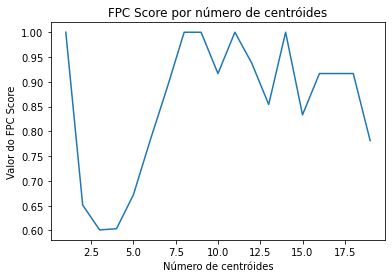

In [41]:
# plot dos valores do fpc

plt.plot(range(1,20), fpcs)
plt.title('FPC Score por número de centróides')
plt.xlabel('Número de centróides')
plt.ylabel('Valor do FPC Score')
plt.show()

In [42]:
fpcs

[1.0,
 0.6511904270539592,
 0.6010965124785359,
 0.603465344558815,
 0.6721092472216998,
 0.7829249684042108,
 0.8886058995268867,
 1.0,
 1.0,
 0.9166666666666667,
 1.0,
 0.9375,
 0.8541666666666667,
 1.0,
 0.8333333333333333,
 0.9166666666666667,
 0.9166666666666667,
 0.9166666666666665,
 0.78125]

<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">7.2. Clustering com 7 centroids</h3></center>
</div>

In [45]:
# clustering com 9 centroides

cntr, u, u0, d, jm, p, fpc = skfuzzy.cluster.cmeans(
        train, 7, 2, error=0.0001, maxiter=1000000, init=None)

In [46]:
# Centroids

centroids = pd.DataFrame(u)

centroid_0 = u[0]
centroid_1 = u[1]
centroid_2 = u[2]
centroid_3 = u[3]
centroid_4 = u[4]
centroid_5 = u[5]
centroid_6 = u[6]

centroids # cada linha representa um centroid

,0,1,2,3,4,5,6,7
0,0.000345,0.000633,0.000376,0.004348,0.999583,0.000101,0.077227,0.000014
1,0.000375,0.000444,0.000169,0.964979,0.000033,0.000049,0.384027,0.000006
2,0.000347,0.000540,0.000475,0.004973,0.000078,0.999430,0.084084,0.000014
3,0.000465,0.000710,0.998198,0.006427,0.000108,0.000176,0.116469,0.000013
4,0.000542,0.996752,0.000340,0.008117,0.000087,0.000097,0.148339,0.000010
5,0.000183,0.000288,0.000179,0.003117,0.000054,0.000074,0.048854,0.999935
6,0.997743,0.000633,0.000261,0.008038,0.000056,0.000073,0.141000,0.000008


In [ ]:
# Perguntar ao professor de MANS o output do fuzzy clustering

<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">7.3. Análise de outputs</h3></center>
</div>

In [438]:
obs1 = train.sort_index().iloc[0, :]

centroids_list = [centroid_0, centroid_1, centroid_2, centroid_3,
                  centroid_4, centroid_5, centroid_6, centroid_7]

In [439]:
dist_to_centroid = []

for i in centroids_list:
    dist_to_centroid.append(scipy.spatial.distance.euclidean(i, obs1))
    

In [440]:
dist_to_centroid

[1.9909899748210265,
 2.0247291218401973,
 1.5705061566888028,
 1.684825769927736,
 1.568508102787655,
 1.7860027618114216,
 1.829391921865232,
 1.9934538114435238]